In [11]:
from PIL import Image
import matplotlib.pyplot as plt
import PIL
import cv2
import numpy as np
from PIL import ImageStat

In [12]:
#pic
img1 = Image.open("origin_images/222.png").convert('L')
#back
img2 = Image.open("back_images/without2to222.png").convert('L')

In [13]:
print(img2.size)
# 将图像转换为NumPy数组（浮点数类型）
image1 = np.array(img1, dtype=np.float64)
image2 = np.array(img2, dtype=np.float64)
result_image = image1 - image2
print(result_image.shape)
print(image2.shape)

(4024, 3036)
(3036, 4024)
(3036, 4024)


In [14]:
# img = Image.fromarray(result_image)
# plt.imshow(result_image, cmap="gray")

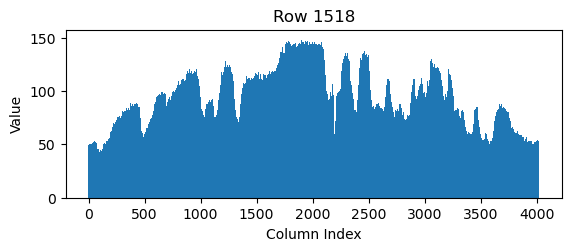

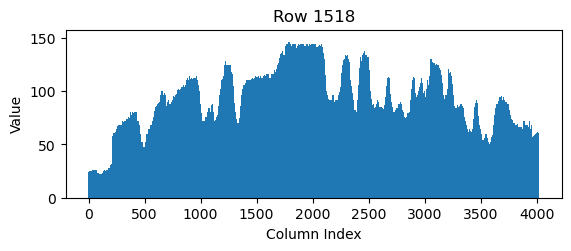

In [15]:
# 打开图像文件
image = image1
# 获取图像的宽度和高度
width, height = image.shape
row_number = 1518
row_data = image[row_number,:]
# 创建柱状图
plt.subplot(211)
plt.bar(range(len(row_data)), row_data, width=1.0)

plt.title(f'Row {row_number}')
plt.xlabel('Column Index')
plt.ylabel('Value')
# 显示图形
plt.show()
plt.subplot(212)
# 打开图像文件
image = image2
# 获取图像的宽度和高度
width, height = image.shape
row_number = 1518
row_data = image[row_number,: ]
plt.bar(range(len(row_data)), row_data, width=1.0)

plt.title(f'Row {row_number}')
plt.xlabel('Column Index')
plt.ylabel('Value')
# 显示图形
plt.show()

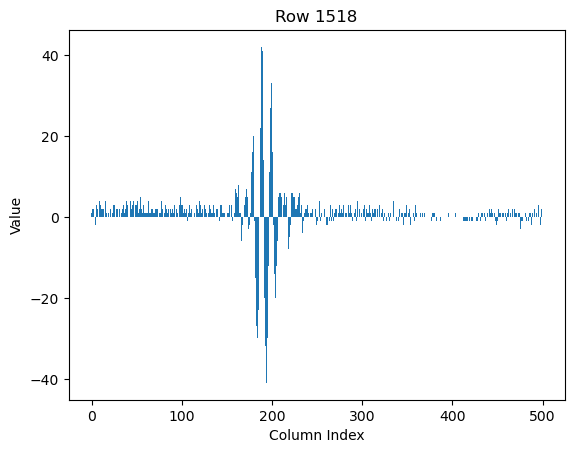

In [22]:
# 打开图像文件
image = result_image
# 获取图像的宽度和高度
width, height = image.shape
row_number = 1518
row_data = image[row_number,2000:2500 ]
plt.bar(range(len(row_data)), row_data, width=1.0)

plt.title(f'Row {row_number}')
plt.xlabel('Column Index')
plt.ylabel('Value')
# 显示图形
plt.show()

In [21]:
# np.save('1-2.npy', result_image)
# print(row_data.shape)
# for element in row_data:
#     print(element)

In [20]:
# 设置打印选项，使其打印所有元素
np.set_printoptions(threshold=np.inf)
# 打印数组
# print(row_data)